# Movie Embeddings

shape (193609, 10)
max= 1.5279455
average= 0.86633563
min= 0.19462027


(array([1.1000e+01, 6.4000e+01, 2.9200e+02, 1.0350e+03, 2.8000e+03,
        6.1580e+03, 1.1013e+04, 1.7695e+04, 2.4487e+04, 2.9280e+04,
        3.0349e+04, 2.7497e+04, 2.0618e+04, 1.2236e+04, 6.1910e+03,
        2.6910e+03, 8.9100e+02, 2.4400e+02, 4.3000e+01, 1.4000e+01]),
 array([0.19462027, 0.26128653, 0.3279528 , 0.39461905, 0.46128532,
        0.5279516 , 0.59461784, 0.6612841 , 0.7279504 , 0.79461664,
        0.8612829 , 0.92794913, 0.99461544, 1.0612817 , 1.1279479 ,
        1.1946142 , 1.2612804 , 1.3279468 , 1.394613  , 1.4612793 ,
        1.5279455 ], dtype=float32),
 <a list of 20 Patch objects>)

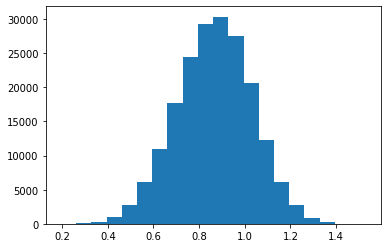

In [18]:
import numpy as np
import matplotlib.pyplot as plt

movie_embeddings = np.load(file="../../data/embeddings_movie_train.npy")

print("shape", movie_embeddings.shape)
lens = np.sqrt(np.sum(a=movie_embeddings*movie_embeddings, axis=1))
print("max=", np.max(lens))
print("average=", np.mean(lens))
print("min=", np.min(lens))

plt.hist(x=lens, bins=20)

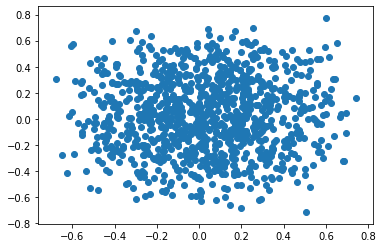

In [19]:
plt.scatter(x=movie_embeddings[:1000,0], y=movie_embeddings[:1000,1])

### Clusters

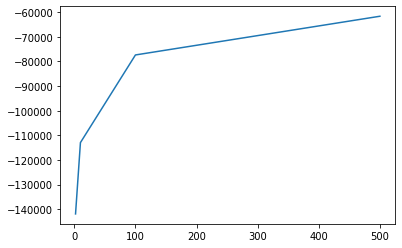

In [3]:
from sklearn.cluster import KMeans

candids_cluster_sizes = [2, 10, 100, 500]
scores = list()
for k in candids_cluster_sizes:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X=movie_embeddings[:1000])
    scores.append(kmeans_model.score(movie_embeddings))

plt.plot(candids_cluster_sizes, scores)


In [30]:
kmeans_model = KMeans(n_clusters=20, random_state=1).fit(X=movie_embeddings[:1000])
membership = kmeans_model.predict(X=movie_embeddings)

In [31]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(movie_embeddings[:1000, :])

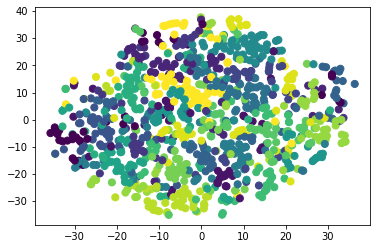

In [32]:
plt.scatter(x=tsne_embeddings[:,0], y=tsne_embeddings[:,1], c=membership[:1000], s=50)

# User Embeddings

shape (610, 10)
max= 1.3192216
average= 1.0117193
min= 0.6760392


(array([  1.,   1.,   2.,   3.,   8.,   5.,  11.,  22.,  51., 176., 141.,
         74.,  40.,  30.,  24.,   7.,   4.,   3.,   3.,   4.]),
 array([0.6760392 , 0.7081983 , 0.74035746, 0.7725166 , 0.8046757 ,
        0.8368348 , 0.86899394, 0.9011531 , 0.9333122 , 0.96547127,
        0.9976304 , 1.0297896 , 1.0619487 , 1.0941077 , 1.126267  ,
        1.158426  , 1.1905851 , 1.2227442 , 1.2549033 , 1.2870625 ,
        1.3192216 ], dtype=float32),
 <a list of 20 Patch objects>)

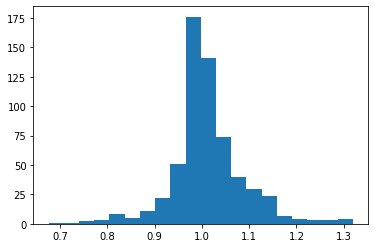

In [24]:
user_embeddings = np.load(file="../../data/embeddings_user_train.npy")

print("shape", user_embeddings.shape)
lens = np.sqrt(np.sum(a=user_embeddings*user_embeddings, axis=1))
print("max=", np.max(lens))
print("average=", np.mean(lens))
print("min=", np.min(lens))

plt.hist(x=lens, bins=20)

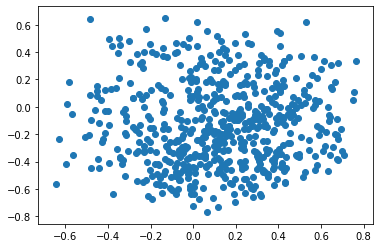

In [8]:
plt.scatter(x=user_embeddings[:,0], y=user_embeddings[:,1])

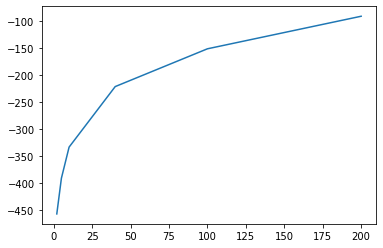

In [9]:
candids_cluster_sizes = [2, 5, 10, 40, 100, 200]
scores = list()
for k in candids_cluster_sizes:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X=user_embeddings)
    scores.append(kmeans_model.score(user_embeddings))

plt.plot(candids_cluster_sizes, scores)


In [25]:
kmeans_model = KMeans(n_clusters=20, random_state=1).fit(X=user_embeddings)
membership = kmeans_model.predict(X=user_embeddings)

In [26]:
tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(user_embeddings)

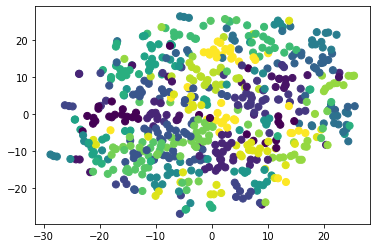

In [27]:
plt.scatter(x=tsne_embeddings[:,0], y=tsne_embeddings[:,1], c=membership, s=50)

# Feature quality

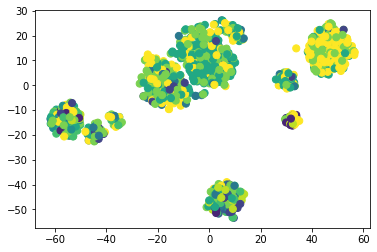

In [34]:
ground_truth_train = np.load(file="./data/rated_embeddings_train.npy")
train_x = ground_truth_train[:, 2:-1]
train_true_ratings = ground_truth_train[:,-1]

tsne = TSNE(n_components=2)
tsne_train_x = tsne.fit_transform(train_x[:1000, :])

plt.scatter(x=tsne_train_x[:,0], y=tsne_train_x[:,1], c=train_true_ratings[:1000], vmin=0, vmax=5, s=50)

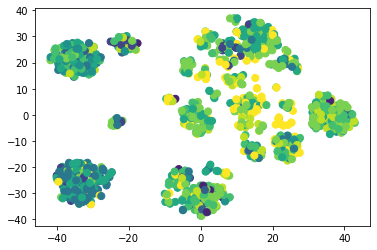

In [35]:
ground_truth_valid = np.load(file="./data/rated_embeddings_valid.npy")
valid_x = ground_truth_valid[:, 2:-1]
valid_true_ratings = ground_truth_valid[:,-1]

tsne = TSNE(n_components=2)
tsne_valid_x = tsne.fit_transform(valid_x[:1000, :])

plt.scatter(x=tsne_valid_x[:,0], y=tsne_valid_x[:,1], c=valid_true_ratings[:1000], vmin=0, vmax=5, s=50)